In [ ]:
import pandas as pd

In [ ]:
# Here I loaded the datasets
#df1 = pd.read_excel("/content/Claim_Verification_English_Train.xlsx")
df1 = pd.read_excel("/content/Claim_Verification_Telugu_Train.xlsx")


In [ ]:
#df2.head()

In [ ]:
#df2.head()

In [ ]:
# Here I concatenated the datasets
#df = pd.concat([df1, df2])
df = df1

In [ ]:
# Here I used df.info to know information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12325 entries, 0 to 12324
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  12325 non-null  object
 1   Label      12325 non-null  object
 2   Category   12325 non-null  object
dtypes: object(3)
memory usage: 289.0+ KB


In [ ]:
df.head() #Here I used the head function to see the head of the df

,Statement,Label,Category
0,"""సాధారణ జలుబు"" కరోనావైరస్తో మునుపటి ఇన్ఫెక్షన్...",True,COVID-19
1,"కోవిడ్-19: రికవరీ రేటులో చండీగఢ్, పంజాబ్ ముందం...",True,COVID-19
2,"కోవిడ్‌తో ముగ్గురు మృతి చెందగా, రాజస్థాన్‌లో 2...",True,COVID-19
3,"భారతదేశం, ఆస్ట్రేలియా 2+2 సంభాషణను కలిగి ఉన్నా...",True,COVID-19
4,క‌రోనా వైర‌స్ వ్యాక్సిన్‌పై భార‌త్‌తో అత్యంత స...,True,COVID-19


In [ ]:
df.tail()

,Statement,Label,Category
12320,పాకిస్థాన్‌లో తుపాకీ గురిపెట్టి దోపిడీకి పాల్ప...,Fake,VIOLENCE
12321,వాస్తవ తనిఖీ: హెలికాప్టర్‌కి మధ్య జరిగిన ప్రమా...,Fake,VIOLENCE
12322,ఇండోర్‌పై దాడికి పోలీసుల ప్రతీకారంగా ముంబై నుం...,Fake,VIOLENCE
12323,1963 సినిమా నుండి క్లిప్ జైలులో సావర్కర్ యొక్క...,Fake,VIOLENCE
12324,ఓల్డ్ ఇండియా టుడే వీడియోలో మోడీకి వ్యతిరేకంగా ...,Fake,VIOLENCE


In [ ]:
df['Label'] = df['Label'].astype(str)

In [ ]:
# Here I used sk-learn to Convert the labels to numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Label'] = le.fit_transform(df.Label.values)

In [ ]:
df.head()

,Statement,Label,Category
0,"""సాధారణ జలుబు"" కరోనావైరస్తో మునుపటి ఇన్ఫెక్షన్...",1,COVID-19
1,"కోవిడ్-19: రికవరీ రేటులో చండీగఢ్, పంజాబ్ ముందం...",1,COVID-19
2,"కోవిడ్‌తో ముగ్గురు మృతి చెందగా, రాజస్థాన్‌లో 2...",1,COVID-19
3,"భారతదేశం, ఆస్ట్రేలియా 2+2 సంభాషణను కలిగి ఉన్నా...",1,COVID-19
4,క‌రోనా వైర‌స్ వ్యాక్సిన్‌పై భార‌త్‌తో అత్యంత స...,1,COVID-19


In [ ]:
#Here I am counting the fake and valid labels.
label_counts = df['Label'].value_counts()
print(label_counts)

Label
0    6165
1    6160
Name: count, dtype: int64


In [ ]:
#Here I am seeing the unique labels
unique_labels_list = df['Label'].unique()
print(f'The unique labels are: {unique_labels_list}')

The unique labels are: [1 0]


In [ ]:
# Here, I shuffeled the dataframe
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
df.head() # seeing the head of the dataframe after shuffling

,Statement,Label,Category
9779,బాబ్రీ కూల్చివేత కేసులో సీబీఐ కోర్టు సెప్టెంబర...,1,VIOLENCE
1217,"విదేశీ భారతీయులను నిర్బంధించడానికి BMC 3,343 హ...",1,COVID-19
5883,వైరల్: గాంధీ మరియు కాంగ్రెస్ గురించి ఫేక్ కోట్...,0,GOVERNMENT
12069,వివిధ నగరాల్లో జరిగిన పాత సంఘటనల చిత్రాలు మరియ...,0,VIOLENCE
4655,ఫ్యాక్ట్ చెక్: కాంగ్రెస్ నేతల తప్పుడు ఆరోపణలకు...,0,GOVERNMENT


In [ ]:
#  Here, I Split the data into training and validation splits
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels_str, val_labels_str = train_test_split(list(df['Statement']), list(df['Label']), test_size=.2)

In [ ]:
# Here I Installed the required packages
!pip install sentencepiece
!pip install transformers
!pip install transformers accelerate
!pip install torch==1.11.00.676617

ERROR: Could not find a version that satisfies the requirement torch==1.11.00.676617 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1)
ERROR: No matching distribution found for torch==1.11.00.676617


In [ ]:
# Here I loaded XLMR tokenizer and XLMR model
from transformers import XLMRobertaTokenizer, XLMRobertaModel
import torch
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Here, I tokenized the texts and finetuned them on the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [ ]:
# Here I created claim verification dataset
class Claim_verification_Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
# Here I encoded the data labels
train_labels = le.fit_transform(train_labels_str)
val_labels = le.transform(val_labels_str)

# Here I created the dataset objects
train_dataset = Claim_verification_Dataset(train_encodings, train_labels)
val_dataset = Claim_verification_Dataset(val_encodings, val_labels)

In [ ]:
# I used an additional classiffication layer on top of my xlmr for this specific task
import torch.nn as nn

class Classification_layer(nn.Module):
    def __init__(self, model_name, num_labels):
        super(Classification_layer, self).__init__()
        self.base_model = XLMRobertaModel.from_pretrained(model_name)
        self.config = self.base_model.config
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.base_model.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]  # CLS token is used for classification here
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, 2), labels.view(-1))

        return (loss, logits) if loss is not None else logits

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch

In [ ]:
# Here, I Instantiated the custom model
model_name = 'xlm-roberta-base'
num_labels = 2  # classes in my data
custom_model = Classification_layer(model_name, num_labels)

In [ ]:
# Here, I Defined metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='micro')
    acc = accuracy_score(labels, preds)
    return {'Accuracy': acc, 'F1': f1, 'Precision': precision, 'Recall': recall}

In [ ]:
!pip install wandb
import wandb

In [ ]:
# Here, I initialized the weights & biases
wandb.init(project='Xlmr_Error_analysis', name='Telugu_only')

eval/Accuracy,▁▁▁▁▁▄▇▆██████▄▅▅▆▇█▇▇▇▇▆████▇██▁▄▄▄▄▄▄▆
eval/F1,▁▁▁▁▁▇████████▃▄▅▅▆▇███▅▇▇▆█▇▇█▁▁▄▄▄▄▄▇▆
eval/Precision,▁▁▁▁▁▇█████████▄▄▅▅▇███▇▇▆▇█▇███▁▄▄▄▄▄▄▇
eval/Recall,▁▁▁▁▁▆██████████▄▄▅▆███▅▇▇▇▆▇█████▁▄▄▄▇▆
eval/loss,██▇▆▆▂▁▂▁▄▁▃▃▁▂▆▆▅▂▁▁▅▂▅▂▄▆▂▃▁▂▃▂▂▆▅▆▆▆▄
eval/runtime,████████▇▇█████▇███████████████████████▁
eval/samples_per_second,▁▇█▆▇▇█▆█▇▇▇▅▇▇▅▇▆▅▆▆▅█▆▇▇▇▇▆▇▇▆▇▇▆▇▇▇▅▆
eval/steps_per_second,▂▃▇▇█▇▇▇▆██▇▆▅▇▇█▇▇▅▆▇▆▆█▇▇█▇▇▇▇▇▇▆▆▇▅▆▁
test/Accuracy,████▁
test/F1,████▁
test/Precision,████▁


In [ ]:
# Here I defined the training arguments
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback

training_args = TrainingArguments(
    learning_rate=0.0001,
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    do_eval=True,
    eval_strategy="steps",
    load_best_model_at_end=True,
    eval_steps=10,
    report_to='wandb',
)

# Here I Initialized the Trainer
trainer = Trainer(
    model=custom_model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,            # evaluation dataset
    compute_metrics=compute_metrics,     # compute metrics function
    callbacks=[EarlyStoppingCallback(early_stopping_patience=10)]
)


In [ ]:
# Here I trained the model
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
10,0.802600,0.750167,0.504665,0.504665,0.504665,0.504665
20,0.722600,0.713827,0.505071,0.505071,0.505071,0.505071
30,0.732000,0.601238,0.723732,0.723732,0.723732,0.723732
40,0.637900,0.587970,0.688438,0.688438,0.688438,0.688438
50,0.626500,0.517365,0.793509,0.793509,0.793509,0.793509
60,0.683100,0.518857,0.774848,0.774848,0.774848,0.774848
70,0.612200,0.538733,0.748479,0.748479,0.748479,0.748479
80,0.668200,0.493877,0.780527,0.780527,0.780527,0.780527
90,0.573200,0.437076,0.828803,0.828803,0.828803,0.828803
100,0.542400,0.411445,0.866937,0.866937,0.866937,0.866937


TrainOutput(global_step=1851, training_loss=0.31615225956254495, metrics={'train_runtime': 1274.8432, 'train_samples_per_second': 23.203, 'train_steps_per_second': 1.452, 'total_flos': 0.0, 'train_loss': 0.31615225956254495, 'epoch': 3.0})

In [ ]:
# Here I evaluated the model on validation data
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.3974510729312897, 'eval_Accuracy': 0.8470588235294118, 'eval_F1': 0.8470588235294118, 'eval_Precision': 0.8470588235294118, 'eval_Recall': 0.8470588235294118, 'eval_runtime': 5.3825, 'eval_samples_per_second': 457.967, 'eval_steps_per_second': 28.797, 'epoch': 1.1183144246353323}


#Pushing_the_model_to_hugging_face

In [ ]:
from huggingface_hub import login

login()

In [ ]:
from huggingface_hub import create_repo

# Create a new repository with the desired name
repo_name = "Claim_verification_XLM_R"  # Desired repository name
create_repo(repo_name)

RepoUrl('https://huggingface.co/Blue7Bird/Claim_verification_XLM_R', endpoint='https://huggingface.co', repo_type='model', repo_id='Blue7Bird/Claim_verification_XLM_R')

In [ ]:
from transformers import XLMRobertaForSequenceClassification, XLMRobertaTokenizer

# Load the tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

# Load the model
model = XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=2)  # Assuming binary classification

# Resize token embeddings
model.resize_token_embeddings(len(tokenizer))


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embedding(250002, 768, padding_idx=1)

In [ ]:
model.save_pretrained("/content/results")
tokenizer.save_pretrained("/content/results")

('/content/results/tokenizer_config.json',
 '/content/results/special_tokens_map.json',
 '/content/results/sentencepiece.bpe.model',
 '/content/results/added_tokens.json')

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("/content/results")
model = AutoModelForSequenceClassification.from_pretrained("/content/results")

In [ ]:
model.push_to_hub("Blue7Bird/Claim_verification_XLM_R")
tokenizer.push_to_hub("Blue7Bird/Claim_verification_XLM_R")

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/Blue7Bird/Claim_verification_XLM_R/commit/8a115314acca1d0c3c7dadfa80df4b167d5619b0', commit_message='Upload tokenizer', commit_description='', oid='8a115314acca1d0c3c7dadfa80df4b167d5619b0', pr_url=None, pr_revision=None, pr_num=None)

#Erroranalysis on English test set

In [ ]:
#Here I loaded the test set
test_df = pd.read_excel("/content/Claim_Verification_English_Test.xlsx")

In [ ]:
len(test_df)

990

In [ ]:
test_df.head()

,Statement,Label,Category
0,Previous infection with �common cold� coronavi...,True,COVID-19
1,"Covid-19: Chandigarh, Punjab lead in recovery ...",True,COVID-19
2,"Three die of Covid, 286 new cases in Rajasthan",True,COVID-19
3,"India, Australia hold 2+2 dialogue; resolve to...",True,COVID-19
4,US working ���very closely�۪ with India on vac...,True,COVID-19


In [ ]:
test_df.tail()

,Statement,Label,Category
985,Fact Check: Picture of a cop beating a priest ...,Fake,VIOLENCE
986,Fact Check: Does This Video Show Women Perform...,Fake,VIOLENCE
987,Janam TV falsely links IS-Al Qaeda to annual f...,Fake,VIOLENCE
988,Dated Photos Of A Suicide In Spain Falsely Lin...,Fake,VIOLENCE
989,"In March 2019, Electoral Bonds worth more than...",Fake,VIOLENCE


In [ ]:
test_texts = list(test_df['Statement'])

In [ ]:
test_df['Label'] = test_df['Label'].astype(str)

In [ ]:
test_df['Label'] = le.fit_transform(test_df.Label.values) #Here I am converting the lables to numbers

In [ ]:
test_labels = test_df['Label']

In [ ]:
len(test_labels)

990

In [ ]:
test_encodings = tokenizer(test_texts, truncation=True, padding=True) #Tokenization of the dataset
test_dataset = Claim_verification_Dataset(test_encodings, test_labels)

In [ ]:
test_metrics = trainer.evaluate(test_dataset) #Evaluating the test_dataset on the model

In [ ]:
print(test_metrics) #Here I am printing the final scores of the testset

{'eval_loss': 0.33033403754234314, 'eval_Accuracy': 0.8828282828282829, 'eval_F1': 0.8828282828282829, 'eval_Precision': 0.8828282828282829, 'eval_Recall': 0.8828282828282829, 'eval_runtime': 1.799, 'eval_samples_per_second': 550.32, 'eval_steps_per_second': 34.464, 'epoch': 3.0}


File saved as misclassified_claims_English_testset.xlsx
Category
COVID-19      24
ELECTION      11
GOVERNMENT    22
POLITICS      30
TRAD          13
VIOLENCE      16
dtype: int64


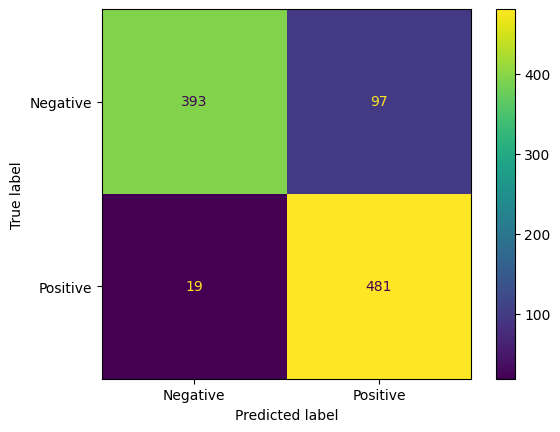

In [ ]:
# Here I made the predictions on the test dataset using the trained model
test_predictions = trainer.predict(test_dataset)

# Here I converted the predictions into label indices by taking the argmax
pred_labels = test_predictions.predictions.argmax(-1)

# Here I assigned the predicted labels to a new column in the test dataframe
test_df['Predicted_Label'] = pred_labels

# Here I created a new column in the test dataframe that checks if the predicted label matches the true label
test_df['Correct'] = test_df['Label'] == test_df['Predicted_Label']

# Here I filtered the dataframe to include only the rows where the prediction was incorrect
misclassified = test_df[test_df['Correct'] == False]

# Here I displayed the columns 'Claim', 'Label', and 'Predicted_Label' from the misclassified examples
misclassified[['Statement', 'Label', 'Predicted_Label']]

# Save the misclassified claims into a dataframe
misclassified_df = misclassified[['Statement', 'Label', 'Predicted_Label']]

file_path = 'misclassified_claims_English_testset.xlsx'
misclassified_df.to_excel(file_path, index=False)

print(f"File saved as {file_path}")

# Here I created a confusion matrix of the test set based on the results of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_df['Label'], test_df['Predicted_Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()

# Here I wanted to see which labels are misclassified
category_errors = misclassified.groupby('Category').size()
#category_errors.index = category_errors.index.map({0: 'Negative', 1: 'Positive'})
print(category_errors)


#Error analysis on Telugu test set

In [ ]:
#Here I loaded the test set
test_df = pd.read_excel("/content/Claim_Verification_Telugu_Test.xlsx")

In [ ]:
len(test_df)

990

In [ ]:
test_df.head()

,Statement,Label,Category
0,"""సాధారణ జలుబు"" కరోనావైరస్తో మునుపటి ఇన్ఫెక్షన్...",True,COVID-19
1,"కోవిడ్-19: రికవరీ రేటులో చండీగఢ్, పంజాబ్ ముందం...",True,COVID-19
2,"కోవిడ్‌తో ముగ్గురు మృతి చెందగా, రాజస్థాన్‌లో 2...",True,COVID-19
3,"భారతదేశం, ఆస్ట్రేలియా 2+2 సంభాషణను కలిగి ఉన్నా...",True,COVID-19
4,క‌రోనా వైర‌స్ వ్యాక్సిన్‌పై భార‌త్‌తో అత్యంత స...,True,COVID-19


In [ ]:
test_df.tail()

,Statement,Label,Category
985,వాస్తవం తనిఖీ: ఎంపీలో పూజారిని కొట్టిన పోలీసు ...,Fake,VIOLENCE
986,వాస్తవ తనిఖీ: ఈ వీడియోలో మహిళలు 'రామ్ భజనలు' ప...,Fake,VIOLENCE
987,జనమ్ టీవీ కేరళ కాలేజీలో వార్షిక కార్యక్రమాలకు ...,Fake,VIOLENCE
988,స్పెయిన్‌లో ఆత్మహత్య చేసుకున్న తేదీ ఫోటోలు కరో...,Fake,VIOLENCE
989,"మార్చి 2019లో, ఢిల్లీలో 77% కంటే ఎక్కువ విలువై...",Fake,VIOLENCE


In [ ]:
test_texts = list(test_df['Statement'])

In [ ]:
test_df['Label'] = test_df['Label'].astype(str)

In [ ]:
test_df['Label'] = le.fit_transform(test_df.Label.values) #Here I am converting the lables to numbers

In [ ]:
test_labels = test_df['Label']

In [ ]:
len(test_labels)

990

In [ ]:
test_encodings = tokenizer(test_texts, truncation=True, padding=True) #Tokenization of the dataset
test_dataset = Claim_verification_Dataset(test_encodings, test_labels)

In [ ]:
test_metrics = trainer.evaluate(test_dataset) #Evaluating the test_dataset on the model

In [ ]:
print(test_metrics) #Here I am printing the final scores of the testset

{'eval_loss': 0.22656786441802979, 'eval_Accuracy': 0.9313131313131313, 'eval_F1': 0.9313131313131313, 'eval_Precision': 0.9313131313131313, 'eval_Recall': 0.9313131313131313, 'eval_runtime': 2.1968, 'eval_samples_per_second': 450.648, 'eval_steps_per_second': 28.222, 'epoch': 3.0}


File saved as misclassified_claims_Telugu_test_set.xlsx
Category
COVID-19      13
ELECTION       8
GOVERNMENT    14
POLITICS      22
TRAD           5
VIOLENCE       6
dtype: int64


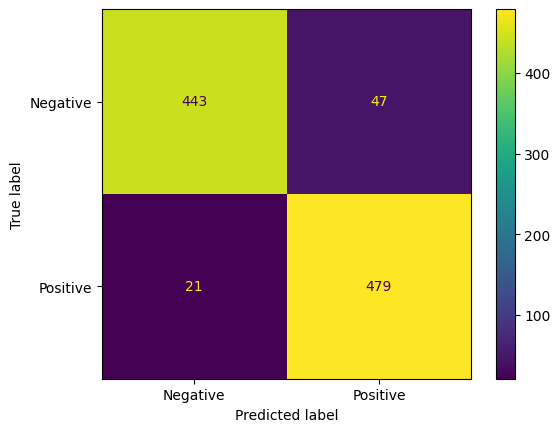

In [ ]:
# Here I made the predictions on the test dataset using the trained model
test_predictions = trainer.predict(test_dataset)

# Here I converted the predictions into label indices by taking the argmax
pred_labels = test_predictions.predictions.argmax(-1)

# Here I assigned the predicted labels to a new column in the test dataframe
test_df['Predicted_Label'] = pred_labels

# Here I created a new column in the test dataframe that checks if the predicted label matches the true label
test_df['Correct'] = test_df['Label'] == test_df['Predicted_Label']

# Here I filtered the dataframe to include only the rows where the prediction was incorrect
misclassified = test_df[test_df['Correct'] == False]

# Here I displayed the columns 'Claim', 'Label', and 'Predicted_Label' from the misclassified examples
misclassified[['Statement', 'Label', 'Predicted_Label']]

# Save the misclassified claims into a dataframe
misclassified_df = misclassified[['Statement', 'Label', 'Predicted_Label']]

file_path = 'misclassified_claims_Telugu_test_set.xlsx'
misclassified_df.to_excel(file_path, index=False)

print(f"File saved as {file_path}")

# Here I created a confusion matrix of the test set based on the results of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_df['Label'], test_df['Predicted_Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()

# Here I wanted to see which labels are misclassified
category_errors = misclassified.groupby('Category').size()
print(category_errors)